# IndoLocate


#### Model Training

In [1]:
%run train.py

[*] Intializing kNN model
[*] Loading configuration from indolocate/configs/knn.yaml


I0000 00:00:1740414441.592045  496795 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740414441.611812  496795 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740414441.611915  496795 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740414441.614129  496795 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[*] Model trained with 697 samples.
[*] kNN model saved to models/knn_model.pkl
[*] Intializing RF model
[*] Loading configuration from indolocate/configs/rf.yaml
[*] Model trained with 697 samples.
[*] RF model saved to models/rf_model.pkl
[*] Intializing DNN model
[*] Loading configuration from indolocate/configs/dnn.yaml
Epoch 1/3000


I0000 00:00:1740414442.799860  496914 service.cc:146] XLA service 0x7bea4c00ba00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740414442.799876  496914 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9


 6/24 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 3528.9048

I0000 00:00:1740414444.284523  496914 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2671.0730
Epoch 2/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 542.8167
Epoch 3/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 289.4386
Epoch 4/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 180.9075
Epoch 5/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 114.8058
Epoch 6/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 85.9162 
Epoch 7/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 75.0980
Epoch 8/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 58.2475
Epoch 9/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 53.4365
Epoch 10/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 49.2900
Epoch 11/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 41.5725
Epoch 12/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 41.1589
Epoch 13/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 39.9154
Epoch 14/3000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 27.0664
Epoch 15/3000
24/24 ━━


#### Model Evaluation

In [1]:
# Model Evaluation
import indolocate
import pandas as pd
from indolocate.utils import preprocess_rssi

# Test Dataset
X_test_dataset = pd.read_csv("/mnt/LabData/datasets/indoor_localization/Tampere/FINGERPRINTING_DB/Test_rss_21Aug17.csv")
Y_test_dataset = pd.read_csv("/mnt/LabData/datasets/indoor_localization/Tampere/FINGERPRINTING_DB/Test_coordinates_21Aug17.csv")
X_test, Y_test = preprocess_rssi(X_test_dataset.values,  Y_test_dataset.iloc[:, :3].values)

metrics = []

In [4]:
# KNN
knn_model = indolocate.create_model("knn")
knn_model.load("models/knn_model.pkl")
knn_metrics = indolocate.evaluate_model(knn_model, X_test, Y_test)
metrics.append(knn_metrics)

[*] Intializing kNN model
[*] Loading configuration from indolocate/configs/knn.yaml
[*] kNN model loaded with models/knn_model.pkl
[metrics] Algorithm: kNN
[metrics] Mean Absolute Error (MAE): 4.041751288754942
[metrics] Root Mean Squared Error (RMSE): 7.898972235269623
[metrics] Localization Error (LE): 9.47910594076874
[metrics] R-squared (R²): 0.8388176913969115


In [3]:
# RF
rf_model = indolocate.create_model("rf")
rf_model.load("models/rf_model.pkl")
rf_metrics = indolocate.evaluate_model(rf_model, X_test, Y_test)
metrics.append(rf_metrics)

[*] Intializing RF model
[*] Loading configuration from indolocate/configs/rf.yaml
[*] RF model loaded with models/rf_model.pkl
[metrics] Algorithm: RF
[metrics] Mean Absolute Error (MAE): 4.3809531466717235
[metrics] Root Mean Squared Error (RMSE): 8.05035858780582
[metrics] Localization Error (LE): 9.876313307281006
[metrics] R-squared (R²): 0.8447666081218177


In [2]:
# DNN
dnn_model = indolocate.create_model("dnn")
dnn_model.load("models/dnn_model.pkl")
dnn_metrics = indolocate.evaluate_model(dnn_model, X_test, Y_test)
metrics.append(dnn_metrics)

[*] Intializing DNN model
[*] Loading configuration from indolocate/configs/dnn.yaml


I0000 00:00:1740461393.272822  639370 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740461393.292657  639370 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740461393.292756  639370 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740461393.294219  639370 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[*] DNN model loaded with models/dnn_model.pkl


I0000 00:00:1740461393.935097  639654 service.cc:146] XLA service 0x7e567c004e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740461393.935118  639654 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9


  1/124 ━━━━━━━━━━━━━━━━━━━━ 2:02 998ms/step

I0000 00:00:1740461394.902317  639654 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step  
[metrics] Algorithm: DNN
[metrics] Mean Absolute Error (MAE): 4.6252322542896716
[metrics] Root Mean Squared Error (RMSE): 7.759064698524169
[metrics] Localization Error (LE): 10.586413942093541
[metrics] R-squared (R²): 0.8714301740950167


In [6]:
# GBDT
GBDT_model = indolocate.create_model("gbdt")
GBDT_model.load("models/gbdt_model.pkl")
GBDT_metrics = indolocate.evaluate_model(GBDT_model, X_test, Y_test)
metrics.append(GBDT_metrics)

[#] Gradient Boosted Decision Trees model initialized
[*] Loading configuration from indolocate/configs/gbdt.yaml


FileNotFoundError: [Errno 2] No such file or directory: 'models/gbdt_model.pkl'

In [ ]:
# LSTM
LSTM_model = indolocate.create_model("lstm")
LSTM_model.load("models/lstm_model.pkl")
LSTM_metrics = indolocate.evaluate_model(LSTM_model, X_test, Y_test)
metrics.append(LSTM_metrics)

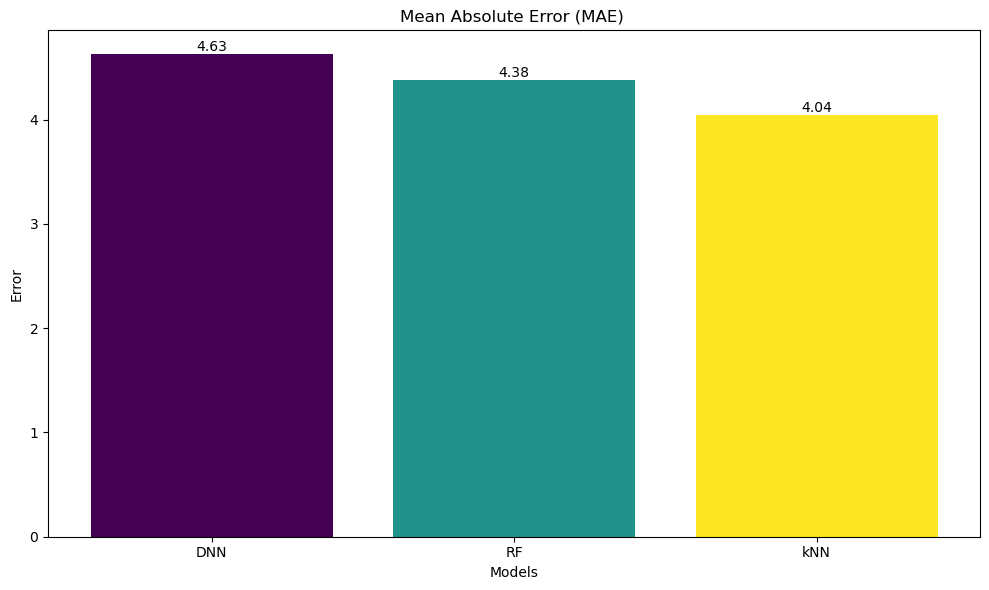

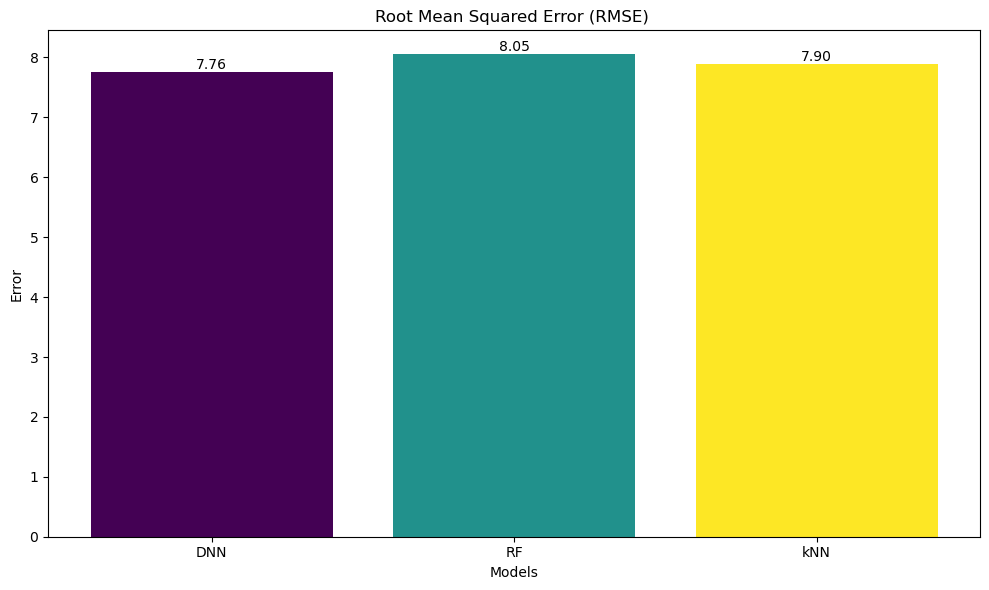

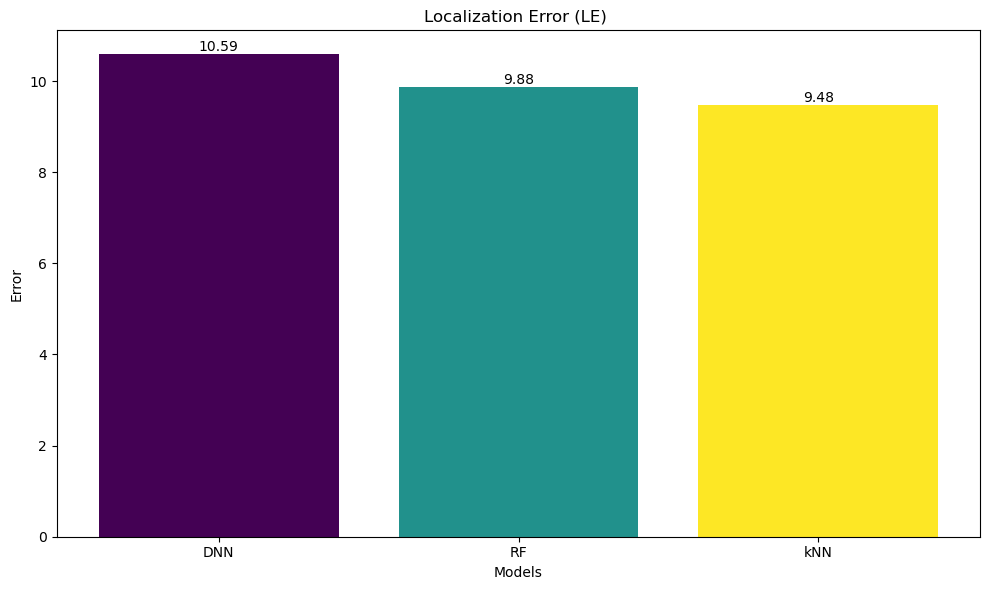

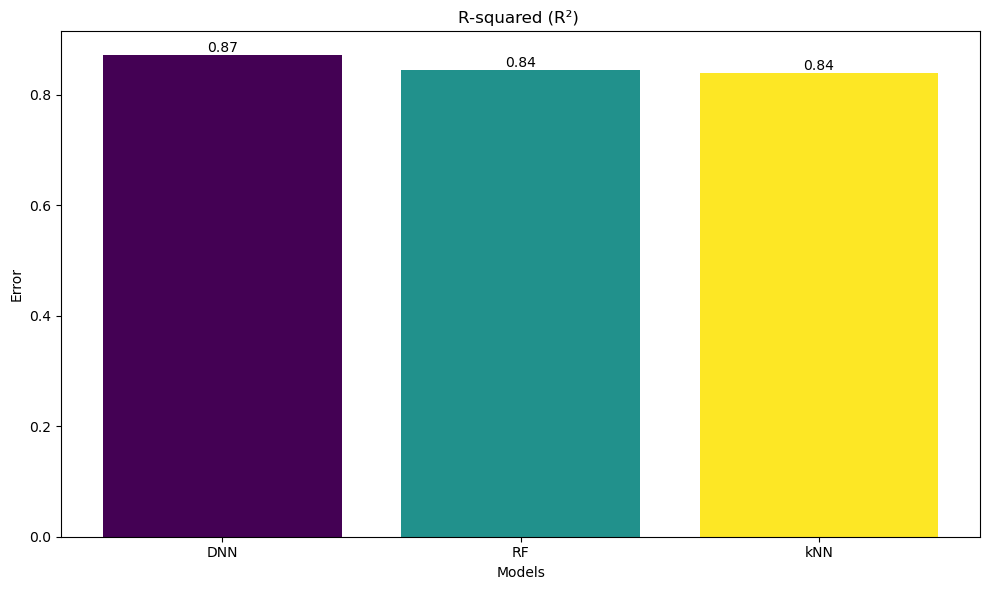

In [5]:
# Evaluation
indolocate.plot_metrics(metrics)